# COVID-19 Tweet Text Sentiment Classification

The COVID-19 pandemic has had a significant impact on the world, both physically and emotionally. Social media has played a major role in the spread of information about the pandemic, as well as in providing a platform for people to share their thoughts and feelings about it.

This project proposes to develop a machine learning model to classify the sentiment of COVID-19 tweets, with a focus on using data mining techniques to improve the model's performance and insights. The model will be trained on a labeled dataset of tweets, and then used to predict the sentiment of new tweets. The sentiment of the tweets can be used to understand public opinion about the pandemic, track trends over time, and identify areas where people need more information or support.

###### Dataset Selection
We selected this dataset for several compelling reasons. Firstly, the dataset contains a diverse range of sentiments, including positive, negative, and neutral labels in the 'sentiment' column.
Secondly, the sheer size of the dataset, comprising 44,955 rows, is advantageous for our analysis. The substantial volume of data provides a rich source of information, ensuring that our model is trained on a diverse set of examples. This large sample size enhances the model's generalization capabilities, enabling it to perform well on a broader range of real-world tweets.

In [1]:
#pip install emoji --upgrade
#!pip install contractions
#!pip install nltk
#%pip install wordcloud

In [2]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import contractions
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

# sklearn
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Flatten


nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajeshredrowthu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajeshredrowthu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajeshredrowthu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Reading csv files
train = pd.read_csv("Corona_train.csv", encoding="latin-1");
test = pd.read_csv("Corona_test.csv", encoding="latin-1");

# 1.Data cleaning and pre-processing

In [4]:
#Combining both the datasets for easier pre-processing
df = pd.concat([train, test], ignore_index=True)

In [5]:
#lets view the first 5 rows of the data to see what type of data we got
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
#lets see how many rows and columns in the data
df.shape

(44955, 6)

In [7]:
#We can get the names of the columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [8]:
#Lets see what unique values are present in each column
for i in df.columns:
    print(f"{i} unique values are {df[i].unique()}")
    print()

UserName unique values are [3799 3800 3801 ... 3796 3797 3798]

ScreenName unique values are [48751 48752 48753 ... 48748 48749 48750]

Location unique values are ['London' 'UK' 'Vagabonds' ... 'Flemington, New Jersey' 'Farmington, NM'
 'Haverford, PA']

TweetAt unique values are ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '02-03-2020' '03-03-2020' '04-03-2020' '05-03-2020' '06-03-2020'
 '07-03-2020' '08-03-2020' '09-03-2020' '10-03-2020' '11-03-2020'
 '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020']

OriginalTweet unique values are ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I

In [9]:
#We directly use info to get column names, datatypes of the columns,shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


We don't need to change any datatypes of columns as we only need columns OriginalTweet and Sentiment for our analysis, but I am not dropping the columns at the moment because it might affect when we are checking for duplicates. For example: If 2 users have tweeted the same thing then if we drop UserName column it might affect our analysis.

#### Handling missing values

In [10]:
df.isna().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [11]:
# As we can see there are 9424 missing values lets see the rows
df[df.isna().any(axis=1)]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
14,3813,48765,NaN,16-03-2020,ADARA Releases COVID-19 Resource Center for Tr...,Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
44924,3768,48720,NaN,16-03-2020,Rough weekend at Albert Heijn supermarket. To ...,Positive
44934,3778,48730,NaN,16-03-2020,Waiting in a line in 1 meter distance from eac...,Neutral
44935,3779,48731,NaN,16-03-2020,In light of the ongoing and rapidly evolving C...,Neutral
44936,3780,48732,NaN,16-03-2020,Stuck inside? How about getting some reading ...,Positive


We have null values in location column but as we won't be using location column for our analysis. We don't need to do anything to handle them.

#### Handling duplicate values

In [12]:
# Lets see if we have any duplicate rows
df.duplicated().any()

False

We didn't got any duplicate rows. So, no need to do anything but if we got duplicated rows then we can easily remove them by using df = df.drop_duplicates()

#### Handling outliers

In particular we won't be doing anything to handle outilers until and unless some anomaly is effecting over results.

Instead of handling outliers we will be doing Text Normalization and Pre-processing

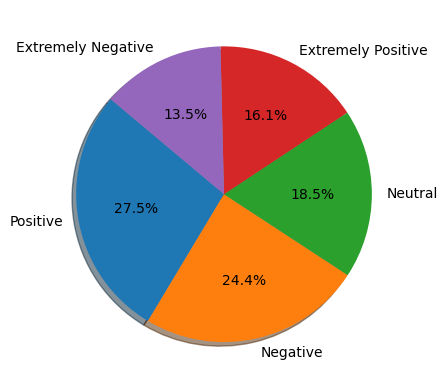

In [13]:
sentiment_count=df["Sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,autopct="%.1f%%", shadow=True,startangle=140)
plt.show()

# Text Preprocessing

## Text Normalization and Features cleaning

In [14]:
def cleaning(data):
    
    df = data.copy()
    
    # Convert column names to lowercase
    df.columns = map(str.lower, df.columns)
    
    # Selecting 'originaltweet' and 'sentiment' colunms as we don't need other columns for analysis.
    df = df[['originaltweet', 'sentiment']]
    
    # Replacing character repetition with a single or double occurence("oooooo" becomes "oo")
    def character_repetition(text):
        text = re.sub(r'(.)\1+', r'\1\1', text)
        return text
    df['originaltweet'] = df['originaltweet'].apply(character_repetition)
    
    # Word contraction
    #Creating a fix_contractions function used to replace contractions with their extended forms by using the contractions package (Simpler and more general way!)
    def fix_contractions(text):
        for k, v in contractions.contractions_dict.items():
            text = text.replace(k, v)
        return text
    df['originaltweet'] = df['originaltweet'].apply(fix_contractions)
    
    # Removing retweets
    def replace_retweet(text, default_replace=""): return re.sub('RT\s+', default_replace, text)
    df['originaltweet'] = df['originaltweet'].apply(replace_retweet)
    
    # Removing Twitter handles
    def remove_tags(text): return re.sub('\B@\w+', ' ' , text)
    df['originaltweet'] = df['originaltweet'].apply(remove_tags)
    
    # Replacing emojis with a meaningful text
    def demojize(text): 
        text = text.replace(":(", "sad")
        text = text.replace(":)", "happy")
        text = text.replace(":3", "cute")
        text = text.replace(":d", "laugh")
        text = text.replace(":-)", "happy")
        text = text.replace(":=)", "happy")
        text = text.replace(":o", "shock")
        text = text.replace("X)", "cool")
        return emoji.demojize(text)
    df['originaltweet'] = df['originaltweet'].apply(demojize)
    
    # Removing urls
    def remove_web_urls(text, default_replace=""):
        return re.sub('(http|https):\/\/\S+', default_replace, text)
    df['originaltweet'] = df['originaltweet'].apply(remove_web_urls)
    
    # Removing # tags
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    df['originaltweet'] = df['originaltweet'].apply(remove_hashtags)
    
    # Removing apostrophe
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    df['originaltweet'] = df['originaltweet'].apply(remove_apostrophe)
    
    # Removing special characters
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_special_chars)
    
    # Removing numbers
    def remove_number(text): return re.sub(r'[\d]', ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_number)
    
    # Only keeps characters and all punctuation will removed.
    def keep_characters(text): return re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚ']", ' ',text)
    df['originaltweet'] = df['originaltweet'].apply(keep_characters)
    
    # Replacing multiple spaces with a single space
    def remove_extra_spaces(text):
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    df['originaltweet'] = df['originaltweet'].apply(remove_extra_spaces)
    
    # Keep words with length>1 only
    def keep_length(text): return re.sub(r'\s+[a-zA-ZáéíóúÁÉÍÓÚ]\s+', ' ', text+' ')
    df['originaltweet'] = df['originaltweet'].apply(keep_length)
    
    # Convert the 'originaltweet' column to lowercase
    df['originaltweet'] = df['originaltweet'].str.lower()
    return df

# Apply function to dataframe
df_clean = cleaning(df)

##### We still have 'Neutral', 'Positive', 'Extremely Negative', 'Negative', 'Extremely Positive' We can change them to Negative, Neutral and Positive

In [15]:
df_clean['sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [16]:
def label_preprocessing(data):
    df = data.copy()
    
    # mapping label
    df['sentiment'] = df['sentiment'].replace({'Extremely Negative': 'negative',
                                                   'Negative': 'negative',
                                                   'Neutral': 'neutral',
                                                   'Positive': 'positive',
                                                   'Extremely Positive': 'positive'})                                    
    return df

df_clean = label_preprocessing(df_clean)

In [17]:
df_clean

,originaltweet,sentiment
0,and and,neutral
1,advice talk to your neighbours family to excha...,positive
2,coronavirus australia woolworths to give elder...,positive
3,my food stock is not the only one which is emp...,positive
4,me ready to go at supermarket during the outbr...,negative
...,...,...
44950,meanwhile in supermarket in israel people danc...,positive
44951,did you panic buy lot of non perishable items ...,negative
44952,asst prof of economics was on talking about he...,neutral
44953,gov need to do somethings instead of biar je r...,negative


In [18]:
df_clean['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [19]:
#Showing transformed results by compare with an original.

# Define how many example we want to show.
n_sample = 2

# Genareated a random iterger which represent an index of dataframe
samples = np.random.randint(0,len(df_clean['originaltweet'])-1,n_sample)

# Compare sentence of each index
for i in range(len(samples)):
    print(f"Sample# {i+1}")
    print()
    print("ORIGINAL")
    print(df['OriginalTweet'][samples[i]])
    print("-"*120)
    print('CLEANED')
    print(df_clean['originaltweet'][samples[i]])
    print()
    print("="*120)
    print()

Sample# 1

ORIGINAL
Shout out to all the millennials who, when their parents die of natural causes in a few years, have to clear out an extra panic-bought freezer full of stockpiled food ?? #lockdownUKnow #StopPanicBuying #coronavirus
------------------------------------------------------------------------------------------------------------------------
CLEANED
shout out to all the millennials who when their parents die of natural causes in few years have to clear out an extra panic bought freezer full of stockpiled food 


Sample# 2

ORIGINAL
The reality is as more and more people get #coronavirus At the supermarket - the baskets, the trolleys, other customers and the checkout staff all have the potential to transfer the disease. #stayhomeaustralia #SocialDistancing #coronavirusaus
------------------------------------------------------------------------------------------------------------------------
CLEANED
the reality is as more and more people get at the supermarket the baskets the

# Exploratory Data Analysis

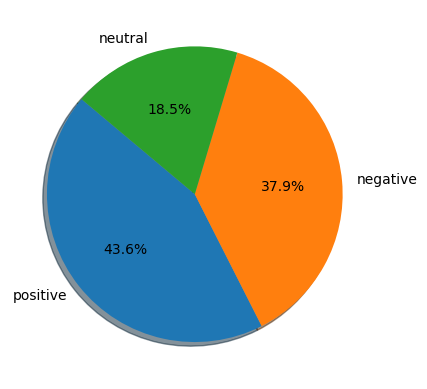

In [20]:
#Lets Visualize the sentiment column 
sentiment_count=df_clean["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,autopct="%.1f%%", shadow=True,startangle=140)
plt.show()

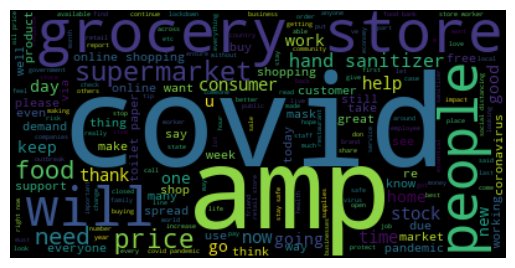

In [21]:
#Wordcloud for positive tweets
pos_tweets = df_clean[df_clean["sentiment"]=="positive"]
txt =''.join(tweet for tweet in pos_tweets["originaltweet"])
wordcloud= WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

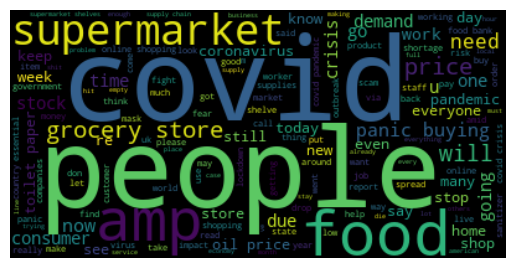

In [22]:
#Wordcloud for negative tweets
neg_tweets = df_clean[df_clean["sentiment"]=="negative"]
txt =''.join(tweet for tweet in neg_tweets["originaltweet"])
wordcloud= WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

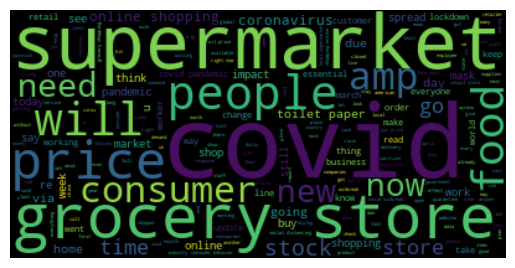

In [23]:
#Wordcloud for neutral tweets
neu_tweets = df_clean[df_clean["sentiment"]=="neutral"]
txt =''.join(tweet for tweet in neu_tweets["originaltweet"])
wordcloud= WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Insights of Exploratory Data Analysis
1. The most frequent words in the tweets are "COVID-19," "pandemic," "mask," and "people."
2. The wordcloud of postive tweets reveals that "safe," "today," "going home," and "online shopping." are among the most common words associated with postive sentiment.
3. The word cloud of negative tweets reveals that "panic," "buy," "lot," "non-perishable," and "item" are among the most common words associated with negative sentiment.
4. The word cloud of neutral tweets indicates that "grocery shopping," "food," "store," and "people" are the most common topics discussed.

# Tokenization

Tokenization is the process of breaking down a text into individual units, typically words or subwords, referred to as tokens. The goal of tokenization is to convert a continuous text into a sequence of discrete tokens, making it easier to process and analyze.

In [24]:
# Method to tokenize tweets using word_tokenize module
def tokenize(tweet):
    tokens = word_tokenize(tweet)
    return tokens

In [25]:
df_tokenized=df_clean.copy()

In [26]:
df_tokenized['originaltweet'] = df_tokenized['originaltweet'].apply(tokenize)

In [27]:
df_tokenized

,originaltweet,sentiment
0,"[and, and]",neutral
1,"[advice, talk, to, your, neighbours, family, t...",positive
2,"[coronavirus, australia, woolworths, to, give,...",positive
3,"[my, food, stock, is, not, the, only, one, whi...",positive
4,"[me, ready, to, go, at, supermarket, during, t...",negative
...,...,...
44950,"[meanwhile, in, supermarket, in, israel, peopl...",positive
44951,"[did, you, panic, buy, lot, of, non, perishabl...",negative
44952,"[asst, prof, of, economics, was, on, talking, ...",neutral
44953,"[gov, need, to, do, somethings, instead, of, b...",negative


In [28]:
# Loading the English stop words corpus
stop_words = set(stopwords.words('english'))  #Creating a set of english stopwords

In [29]:
# Removing certain words from the stopwords set, reason being these words are required for sentiment analysis
stop_words.discard('not')
stop_words.discard('no')
stop_words.discard('off')
stop_words.discard('down')
stop_words.discard('over')
stop_words.discard('won')
stop_words.discard('against')

In [30]:
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_tokenized['originaltweet'] = df_tokenized['originaltweet'].apply(remove_stopwords)

# Stemming

Stemming is a text normalization process that involves reducing words to their base or root form. The goal of stemming is to remove suffixes from words, allowing similar words to be represented with a common root. This helps in reducing the dimensionality of the feature space and capturing the core meaning of words.

In [31]:
df_stem=df_tokenized.copy()
porter_stemmer = PorterStemmer()
#lancaster_stemmer = LancasterStemmer()
#snowball_stemmer = SnowballStemmer('english')

In [32]:
def stem_tokens(tokens, stemmer):
    token_list = []
    for token in tokens:
        token_list.append(stemmer.stem(token))
    return token_list

In [33]:
df_stem['originaltweet'] = df_stem['originaltweet'].apply(lambda tokens: stem_tokens(tokens, porter_stemmer))

In [34]:
df_stem

,originaltweet,sentiment
0,[],neutral
1,"[advic, talk, neighbour, famili, exchang, phon...",positive
2,"[coronaviru, australia, woolworth, give, elder...",positive
3,"[food, stock, not, one, empti, pleas, not, pan...",positive
4,"[readi, go, supermarket, outbreak, not, parano...",negative
...,...,...
44950,"[meanwhil, supermarket, israel, peopl, danc, s...",positive
44951,"[panic, buy, lot, non, perish, item, echo, nee...",negative
44952,"[asst, prof, econom, talk, recent, research, c...",neutral
44953,"[gov, need, someth, instead, biar, je, rakyat,...",negative


# Lemmatization

Lemmatization is a text normalization process that involves reducing words to their base or dictionary form, known as the lemma. Unlike stemming, lemmatization considers the meaning of words and aims to transform words into their canonical or root form. This helps in producing linguistically valid lemmas.

In [35]:
df_lem=df_tokenized.copy()
lemmatizer = WordNetLemmatizer()

In [36]:
def lemmatize_tokens(tokens, lemmatizer):
    token_list = []
    for token in tokens:
        token_list.append(lemmatizer.lemmatize(token))
    return token_list

In [37]:
df_lem['originaltweet'] = df_lem['originaltweet'].apply(lambda tokens: lemmatize_tokens(tokens, lemmatizer))

In [38]:
df_lem

,originaltweet,sentiment
0,[],neutral
1,"[advice, talk, neighbour, family, exchange, ph...",positive
2,"[coronavirus, australia, woolworth, give, elde...",positive
3,"[food, stock, not, one, empty, please, not, pa...",positive
4,"[ready, go, supermarket, outbreak, not, parano...",negative
...,...,...
44950,"[meanwhile, supermarket, israel, people, dance...",positive
44951,"[panic, buy, lot, non, perishable, item, echo,...",negative
44952,"[asst, prof, economics, talking, recent, resea...",neutral
44953,"[gov, need, somethings, instead, biar, je, rak...",negative


In [39]:
# Comparing stemming, lemmatization and original.

n_sample = 2
samples = np.random.randint(0,len(df_lem['originaltweet'])-1,n_sample)
for i in range(len(samples)):
    print(f"Sample# {i+1}")
    print()
    print("ORIGINAL")
    print(df_clean['originaltweet'][samples[i]])
    print("-"*120)
    print('STEMMED')
    print(df_stem['originaltweet'][samples[i]])
    print("-"*120)
    print('LEMMATIZED')
    print(df_lem['originaltweet'][samples[i]])
    print()
    print("="*120)
    print()

Sample# 1

ORIGINAL
the pandemic has created difficult situations for farmers commodity prices from dairy to livestock have plummeted in the past months state amp fed lawmakers are working to create packages to help farmers amp some resources are already available 
------------------------------------------------------------------------------------------------------------------------
STEMMED
['pandem', 'creat', 'difficult', 'situat', 'farmer', 'commod', 'price', 'dairi', 'livestock', 'plummet', 'past', 'month', 'state', 'amp', 'fed', 'lawmak', 'work', 'creat', 'packag', 'help', 'farmer', 'amp', 'resourc', 'alreadi', 'avail']
------------------------------------------------------------------------------------------------------------------------
LEMMATIZED
['pandemic', 'created', 'difficult', 'situation', 'farmer', 'commodity', 'price', 'dairy', 'livestock', 'plummeted', 'past', 'month', 'state', 'amp', 'fed', 'lawmaker', 'working', 'create', 'package', 'help', 'farmer', 'amp', 'resource

We decided to employ lemmatization over stemming is based on its ability to generate more meaningful root words that align with dictionary entries. Unlike stemming, which often results in truncated and generic words, lemmatization preserves the semantic accuracy of the original words by transforming them into valid dictionary forms. This choice is crucial for sentiment analysis tasks, where capturing nuanced meanings is essential. By opting for lemmatization, our goal is to enhance the precision and contextuality of the words in our sentiment analysis model, ensuring a more accurate representation of the underlying sentiments in the text.

# Text Vectorization/Representation

Vectorization is a process in natural language processing (NLP) and machine learning that involves converting textual data into a numerical format, which can be understood and processed by machine learning models. This numerical representation enables algorithms to work with textual data effectively.

In [40]:
df_vect = df_lem.copy()

In [41]:
# Combining individual words to do vectorization
def combine_text(input):
    combined = ' '.join(input)
    return combined
df_vect['originaltweet'] = df_vect['originaltweet'].apply(combine_text)
df_vect

,originaltweet,sentiment
0,,neutral
1,advice talk neighbour family exchange phone nu...,positive
2,coronavirus australia woolworth give elderly d...,positive
3,food stock not one empty please not panic enou...,positive
4,ready go supermarket outbreak not paranoid foo...,negative
...,...,...
44950,meanwhile supermarket israel people dance sing...,positive
44951,panic buy lot non perishable item echo need fo...,negative
44952,asst prof economics talking recent research co...,neutral
44953,gov need somethings instead biar je rakyat ass...,negative


In [42]:
X=df_vect.originaltweet
y=df_vect.sentiment

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.80)

In [44]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  336943


In [45]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Model Development

In [46]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [47]:
# Training the Bernoulli Naive Bayes Machine model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred_NB = BNBmodel.predict(X_test)
y_pred_proba_NB = BNBmodel.predict_proba(X_test)

              precision    recall  f1-score   support

    negative       0.80      0.57      0.67      3466
     neutral       0.85      0.01      0.02      1683
    positive       0.54      0.92      0.68      3842

    accuracy                           0.62      8991
   macro avg       0.73      0.50      0.46      8991
weighted avg       0.70      0.62      0.55      8991



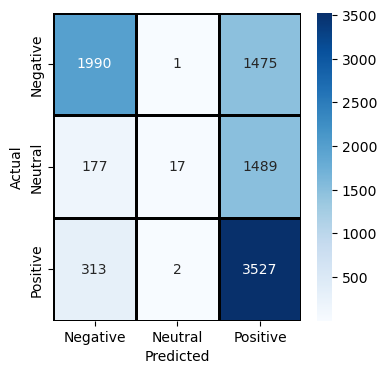

In [48]:
cm = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative','Neutral', 'Positive'], 
            yticklabels = ['Negative','Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# Training the Support Vector Machine model
SVCmodel = SVC(kernel='linear', decision_function_shape='ovr')
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred1_SVC = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

    negative       0.81      0.83      0.82      3466
     neutral       0.79      0.59      0.67      1683
    positive       0.80      0.87      0.83      3842

    accuracy                           0.80      8991
   macro avg       0.80      0.76      0.77      8991
weighted avg       0.80      0.80      0.80      8991



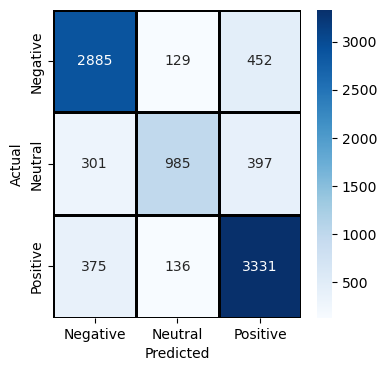

In [50]:
cm = confusion_matrix(y_test, y_pred1_SVC)
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative','Neutral', 'Positive'], 
            yticklabels = ['Negative','Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Findings

*Support Vector Machine (SVM):*
- Achieves a higher overall accuracy compared to Bernoulli Naive Bayes.
- Demonstrates a balanced performance across negative, neutral, and positive classes.
- Particularly strong in classifying positive sentiments.

*Bernoulli Naive Bayes:*
- Lower overall accuracy compared to SVM.
- Struggles with neutral class, as indicated by extremely low recall and F1-score.
- Performs well in classifying positive sentiments but sacrifices precision for the negative class.

*General Observations:*
- SVM outperforms Bernoulli Naive Bayes in terms of overall accuracy and class-wise metrics.
- SVM provides a more balanced and reliable classification across all sentiment classes.
- Bernoulli Naive Bayes, while competitive in some aspects, appears less robust in handling the complexities of sentiment analysis, especially for neutral sentiments.

*Recommendations:*
- Considering the higher overall accuracy and balanced class-wise performance, the SVM model appears to be a more suitable choice for this sentiment analysis task.
- Further investigation into improving the performance of the Bernoulli Naive Bayes model, especially regarding the neutral class, may be warranted.

These observations are based on the metrics provided, and the choice of the best model also depends on the specific objectives and requirements of your sentiment analysis application.

# Model Selection and Optimization

In [51]:
df_vect = df_lem.copy()
df_vect['originaltweet'] = df_vect['originaltweet'].apply(combine_text)

In [52]:
X=df_vect.originaltweet
y=df_vect.sentiment

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.80)

In [54]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  336943


In [55]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [56]:
# Training the Support Vector Machine model
SVCmodel = SVC(kernel='linear', C=10)
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred1_SVC = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

    negative       0.81      0.84      0.83      3466
     neutral       0.80      0.61      0.69      1683
    positive       0.81      0.87      0.84      3842

    accuracy                           0.81      8991
   macro avg       0.81      0.77      0.78      8991
weighted avg       0.81      0.81      0.80      8991



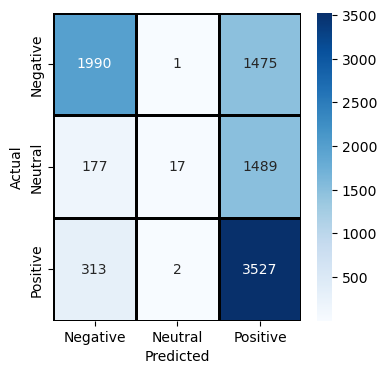

In [57]:
cm = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative','Neutral', 'Positive'], 
            yticklabels = ['Negative','Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Results and Discussion

The original Support Vector Machine (SVM) model exhibits solid performance across the three classes, with consistent precision and recall values. Particularly, it excels in correctly identifying instances in the negative and positive classes, showcasing balanced precision and recall scores. The overall accuracy of 80% is commendable, and the macro and weighted average metrics are relatively balanced, indicating a robust classifier. However, there is room for improvement in the identification of instances belonging to the neutral class, as evidenced by a lower recall and F1-score compared to the other classes. This suggests a potential challenge in capturing nuanced sentiments in the original SVM model.

In contrast, the fine-tuned SVM model demonstrates noticeable enhancements, especially in the neutral class. The precision and F1-score for neutral sentiment have increased, reflecting improved accuracy in predicting instances in this category. However, this improvement comes at the cost of reduced recall, indicating that the model may now struggle to capture all instances of neutral sentiment. The overall accuracy has increased marginally to 81%, and the macro and weighted average metrics also show slight improvements. The fine-tuned model represents a trade-off between precision and recall for the neutral class, emphasizing the importance of understanding the specific goals and priorities of the sentiment classification task. Depending on the application, users may choose the original SVM model for its more balanced recall across classes or opt for the fine-tuned model if precision in identifying neutral sentiment is a higher priority.

# Conclusion and Future Work

#### Insights of Exploratory Data Analysis
1. The most frequent words in the tweets are "COVID-19," "pandemic," "mask," and "people."
2. The wordcloud of postive tweets reveals that "safe," "today," "going home," and "online shopping." are among the most common words associated with postive sentiment.
3. The word cloud of negative tweets reveals that "panic," "buy," "lot," "non-perishable," and "item" are among the most common words associated with negative sentiment.
4. The word cloud of neutral tweets indicates that "grocery shopping," "food," "store," and "people" are the most common topics discussed.

#### Model Selection and Optimization

The original Support Vector Machine (SVM) model exhibits solid performance across the three classes, with consistent precision and recall values. The overall accuracy of 80% is commendable, and the macro and weighted average metrics are relatively balanced, indicating a robust classifier. 

In contrast, the fine-tuned SVM model demonstrates noticeable enhancements, especially in the neutral class. The overall accuracy has increased marginally to 81%, and the macro and weighted average metrics also show slight improvements. The fine-tuned model represents a trade-off between precision and recall for the neutral class, emphasizing the importance of understanding the specific goals and priorities of the sentiment classification task.

Due to lack of enough computational power, we were unable to train the model with deep neural network. We can train the model even better, if we had the required computational power.